In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import os
import sys
import glob


#For plotting
import matplotlib
import scipy
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import copy
from astropy.table import Table
from astropy.io import ascii
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches



matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['image.cmap'] = 'viridis'
matplotlib.rcParams["lines.linewidth"] = 3.
matplotlib.rcParams["lines.markersize"] = 6.
matplotlib.rcParams["lines.markeredgewidth"] = 2.

'''
Necessary only with jupyter notebook
'''
%matplotlib notebook
# %matplotlib qt
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#sys.argv=['-f'] # use of argparse



/tmp/ipykernel_26836/1585365301.py:38: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Read the fits event file

In [15]:
e=20.
angle=12.#deg
de = 1000.*((1-np.cos(np.deg2rad(angle)))*e**2)/(511.+e*(1-np.cos(np.deg2rad(angle))))
print(de)

17.09097872535928


In [7]:
print(EventList)

{0: {'EventID': 0, 'En_dep': array([0.03358706]), 'Scint_ID': array([16]), 'X_Primary': array([-2.26931662]), 'Y_Primary': array([10.04574298]), 'Z_Primary': array([0.9]), 'Theta_Primary': array([90.]), 'Phi_Primary': array([90.]), 'En_Primary': array([20.]), 'X_Detected': array([-21.44203281]), 'Y_Detected': array([10.52110386]), 'Z_Detected': array([9.28275895])}, 2: {'EventID': 2, 'En_dep': array([19.06092377,  0.93907623]), 'Scint_ID': array([117,  16]), 'X_Primary': array([-2.17869298, -2.17869298]), 'Y_Primary': array([9.91099191, 9.91099191]), 'Z_Primary': array([0.9, 0.9]), 'Theta_Primary': array([90., 90.]), 'Phi_Primary': array([90., 90.]), 'En_Primary': array([20., 20.]), 'X_Detected': array([-32.84203339, -21.44203281]), 'Y_Detected': array([10.52110386, 10.52110386]), 'Z_Detected': array([7.63275909, 9.28275895])}, 3: {'EventID': 3, 'En_dep': array([ 0.46254122, 19.53745878]), 'Scint_ID': array([ 16, 105]), 'X_Primary': array([-2.13750742, -2.13750742]), 'Y_Primary': array

Filename: /home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/12x12_source_hx_hz/scorefilescorefile20keV_unpol_12x12mm2_hx_hz.source.fits.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   69226R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degr

<IPython.core.display.Javascript object>


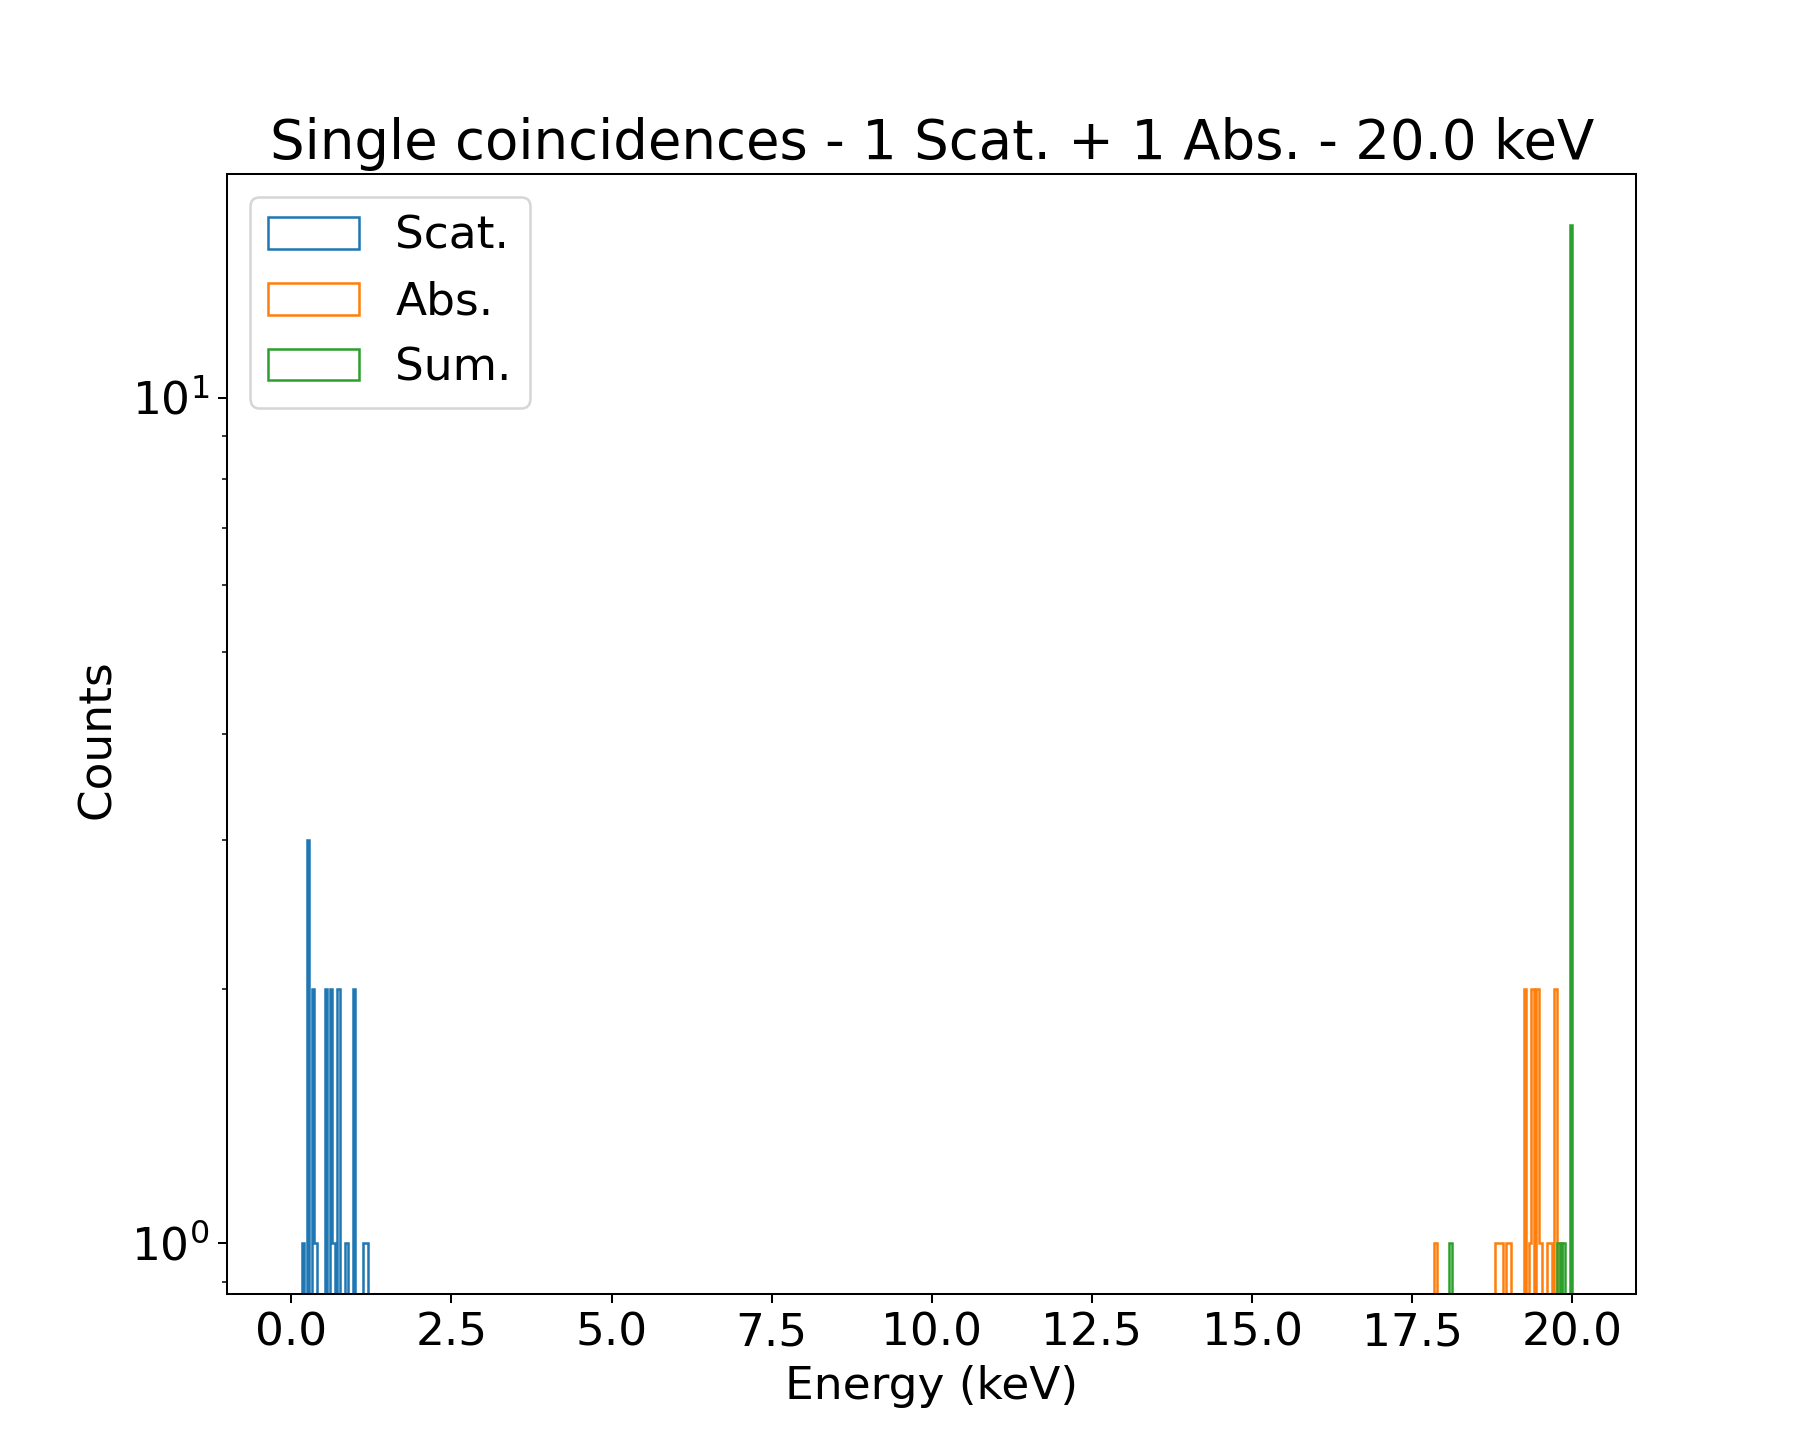

count 1 0
count 2 0
count 3 0
tot  0

energy  20.0
fired photons  10000000.0
area_beam cm^2  144.0
geometric_area cm^2  11.289599999999998
Aeff double coinc. cm^2 0.0
Aeff double coinc. err cm^2 0.0


<IPython.core.display.Javascript object>


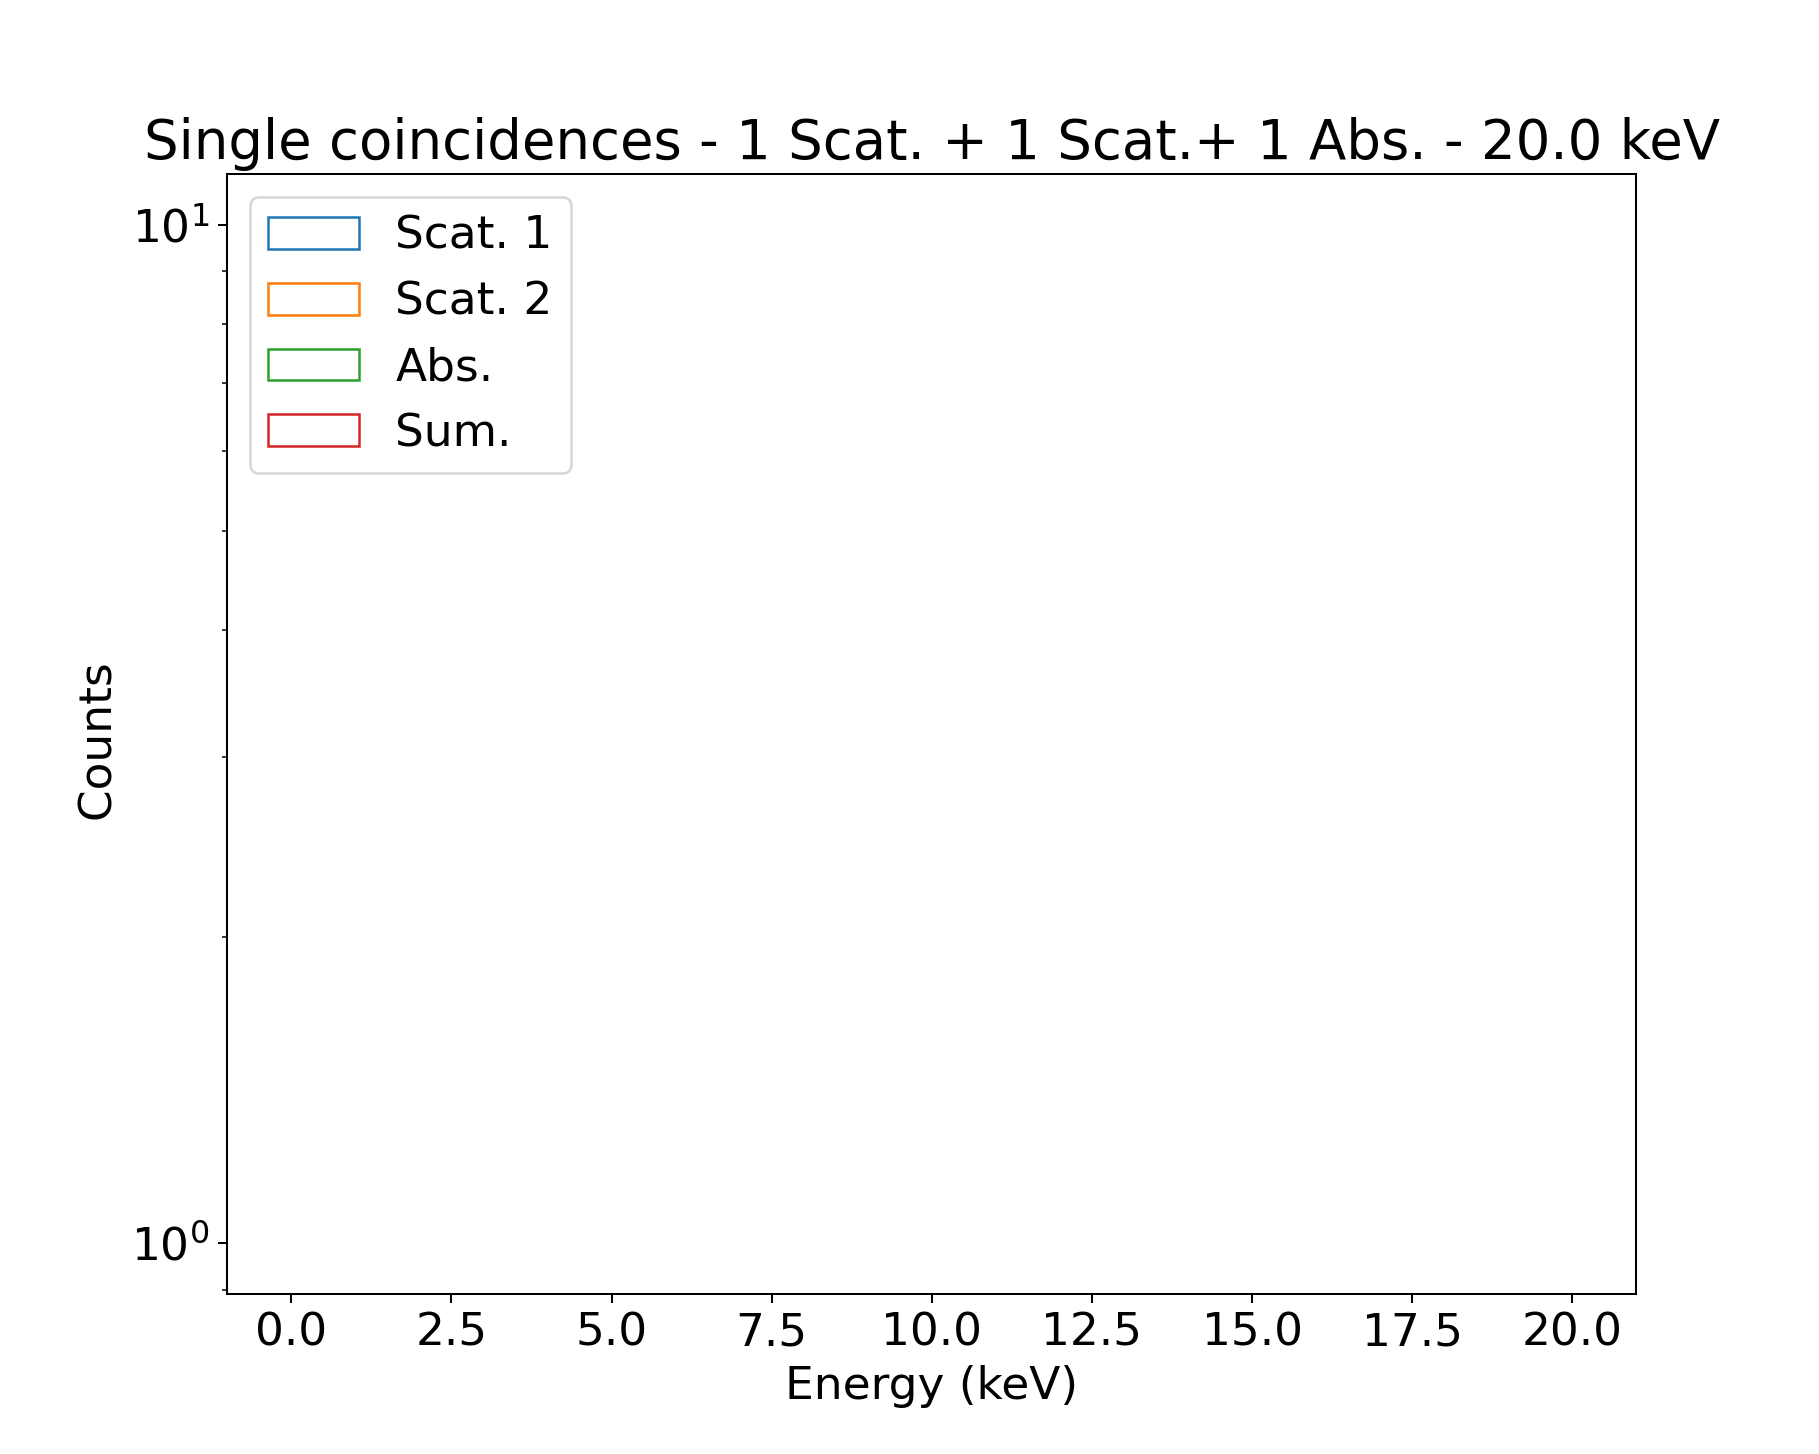

Coinc 2 scatterers  16

energy  20.0
fired photons  10000000.0
area_beam cm^2  144.0
geometric_area cm^2  11.289599999999998
Aeff x2 scaterers cm^2 0.0002304
Aeff x2 scaterers err cm^2 5.76e-05


/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/effective area/cusplib.py:402: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  


<IPython.core.display.Javascript object>


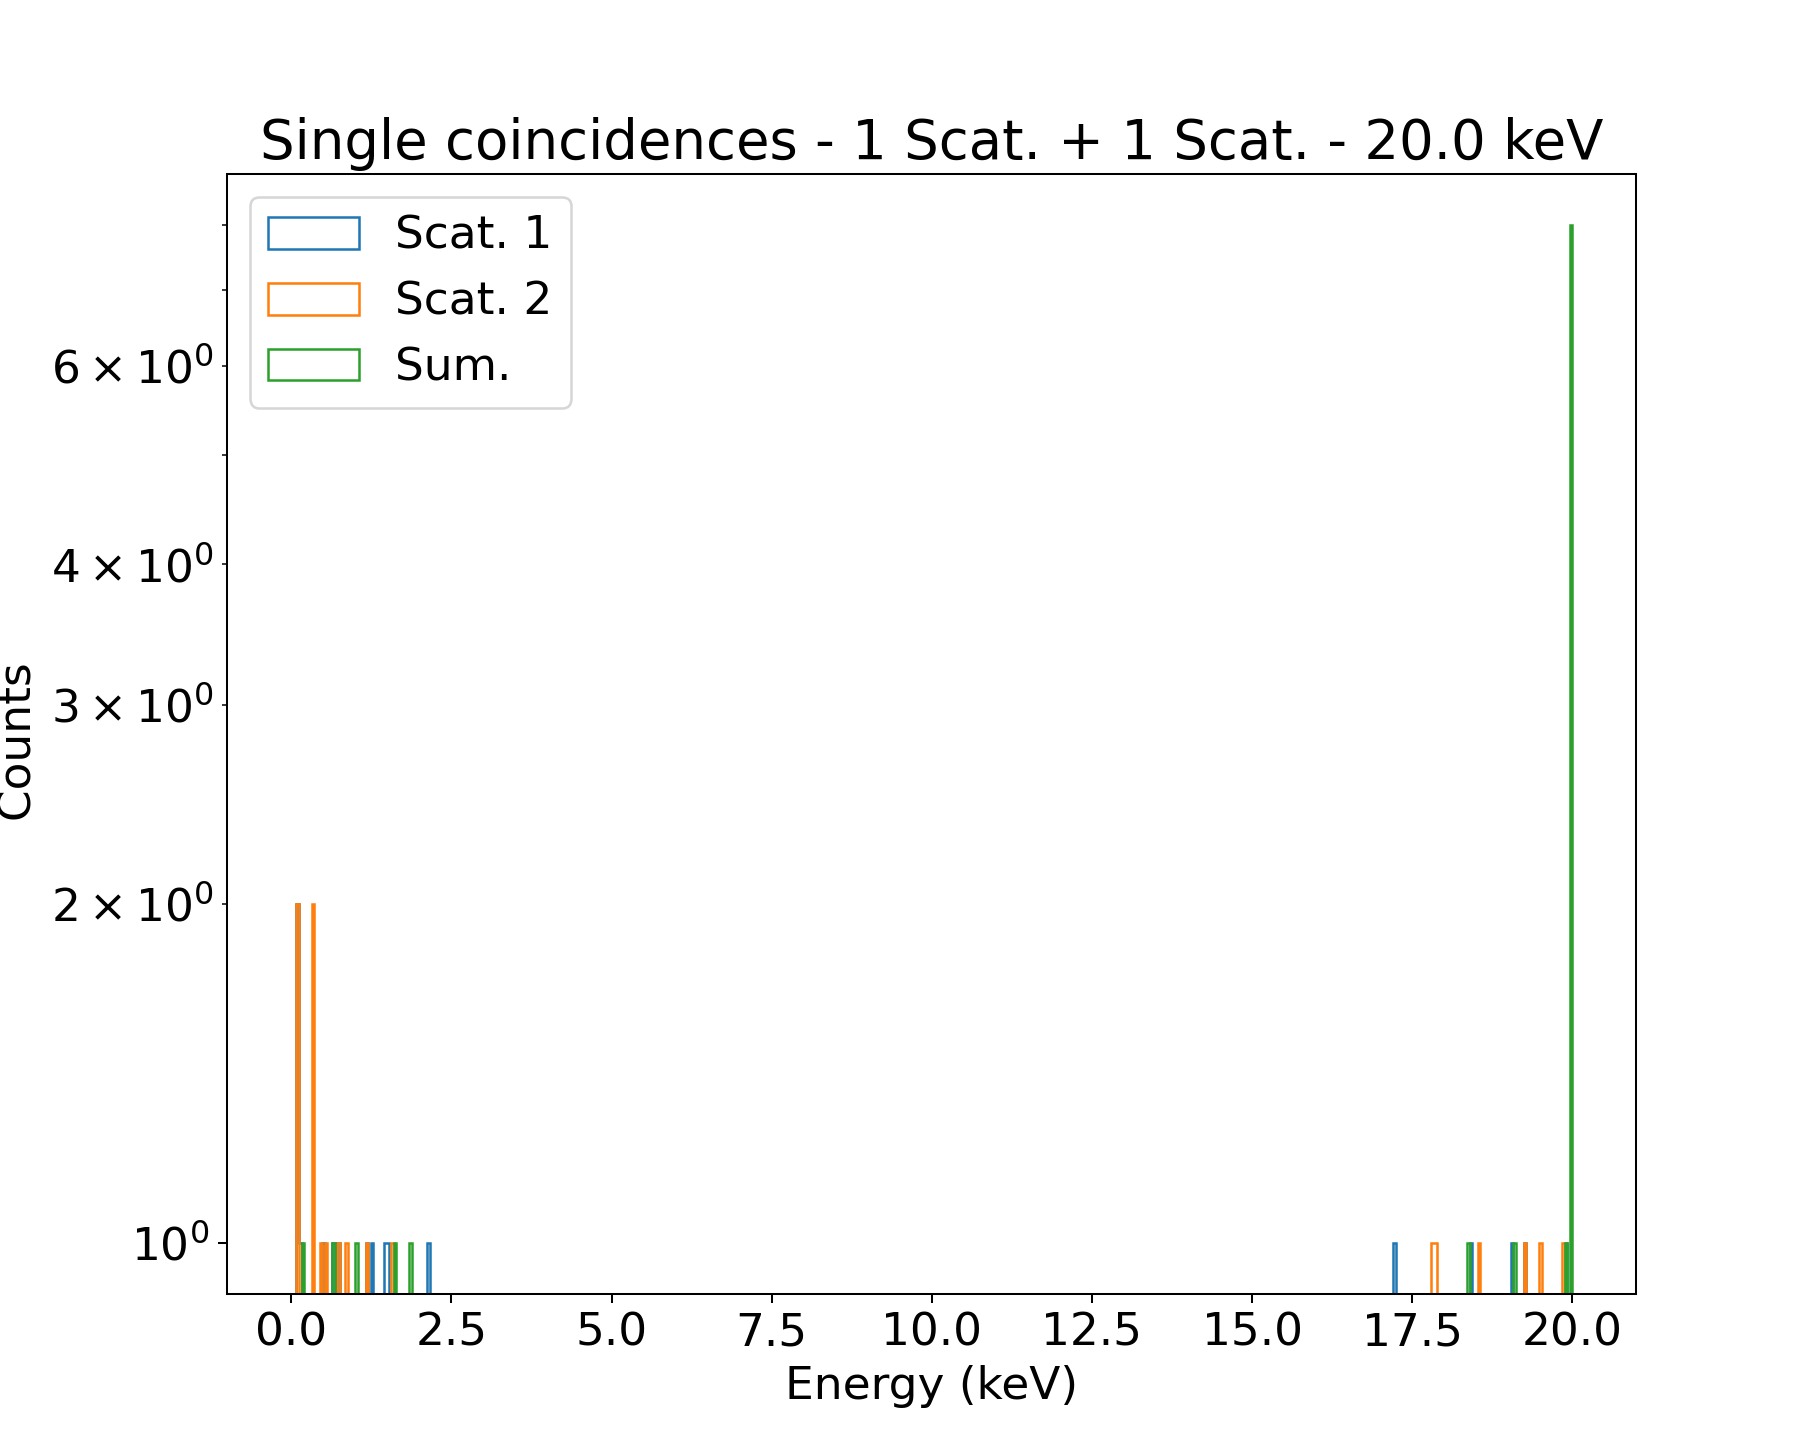

Coinc 3x scatterers  3

energy  20.0
fired photons  10000000.0
area_beam cm^2  144.0
geometric_area cm^2  11.289599999999998
Aeff x2 scaterers cm^2 4.32e-05
Aeff x2 scaterers err cm^2 2.494153162899183e-05


<IPython.core.display.Javascript object>


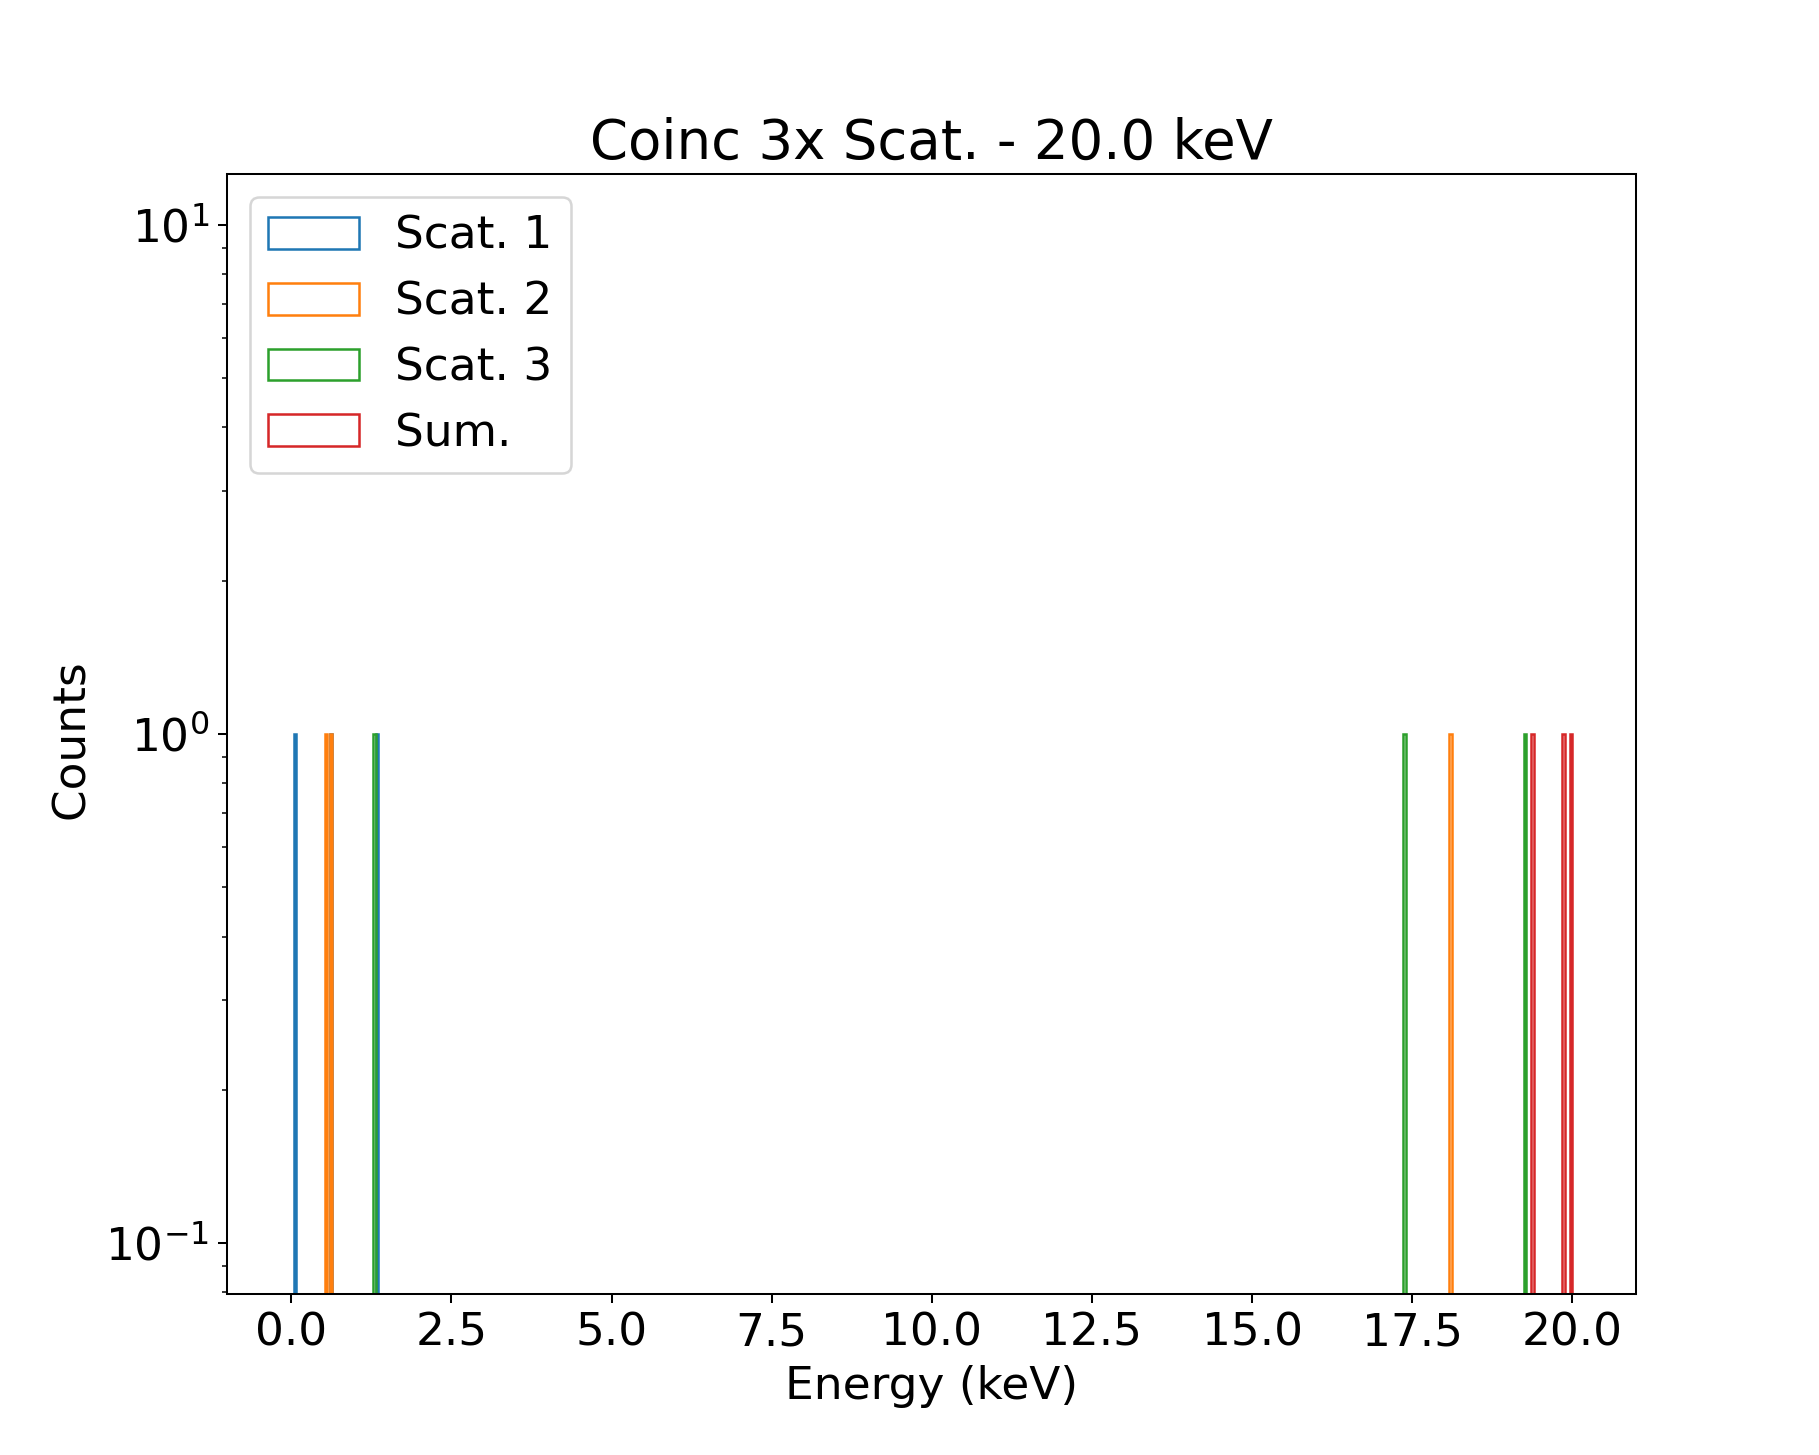

Only 1 Scat. interaction 197

energy  20.0
fired photons  10000000.0
area_beam cm^2  144.0
geometric_area cm^2  11.289599999999998
Aeff single coinc. cm^2 0.0028368
Aeff single coinc. err cm^2 0.00020211363140570205


<IPython.core.display.Javascript object>


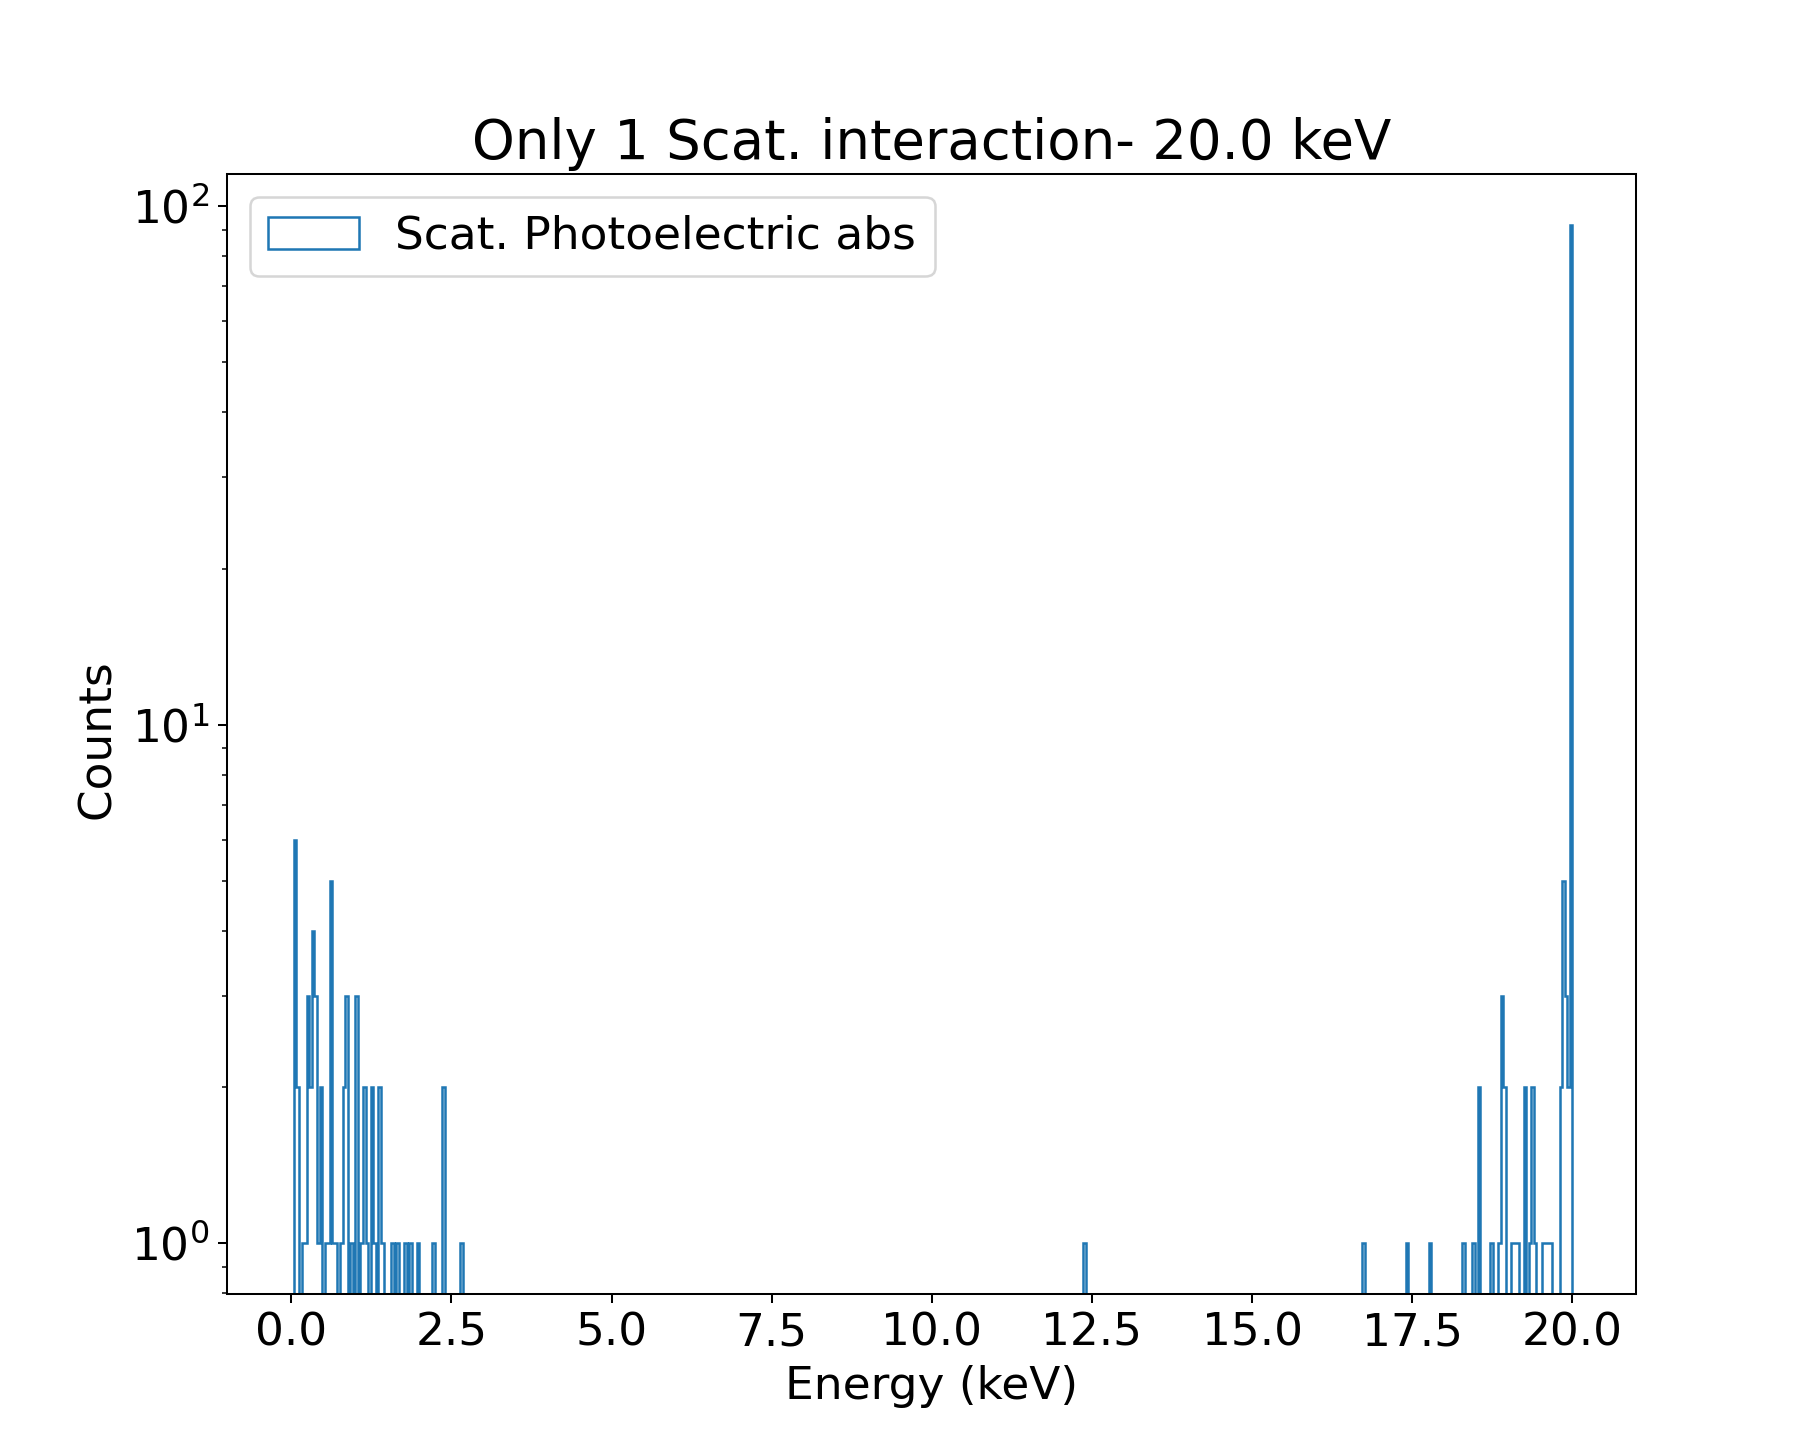

<IPython.core.display.Javascript object>


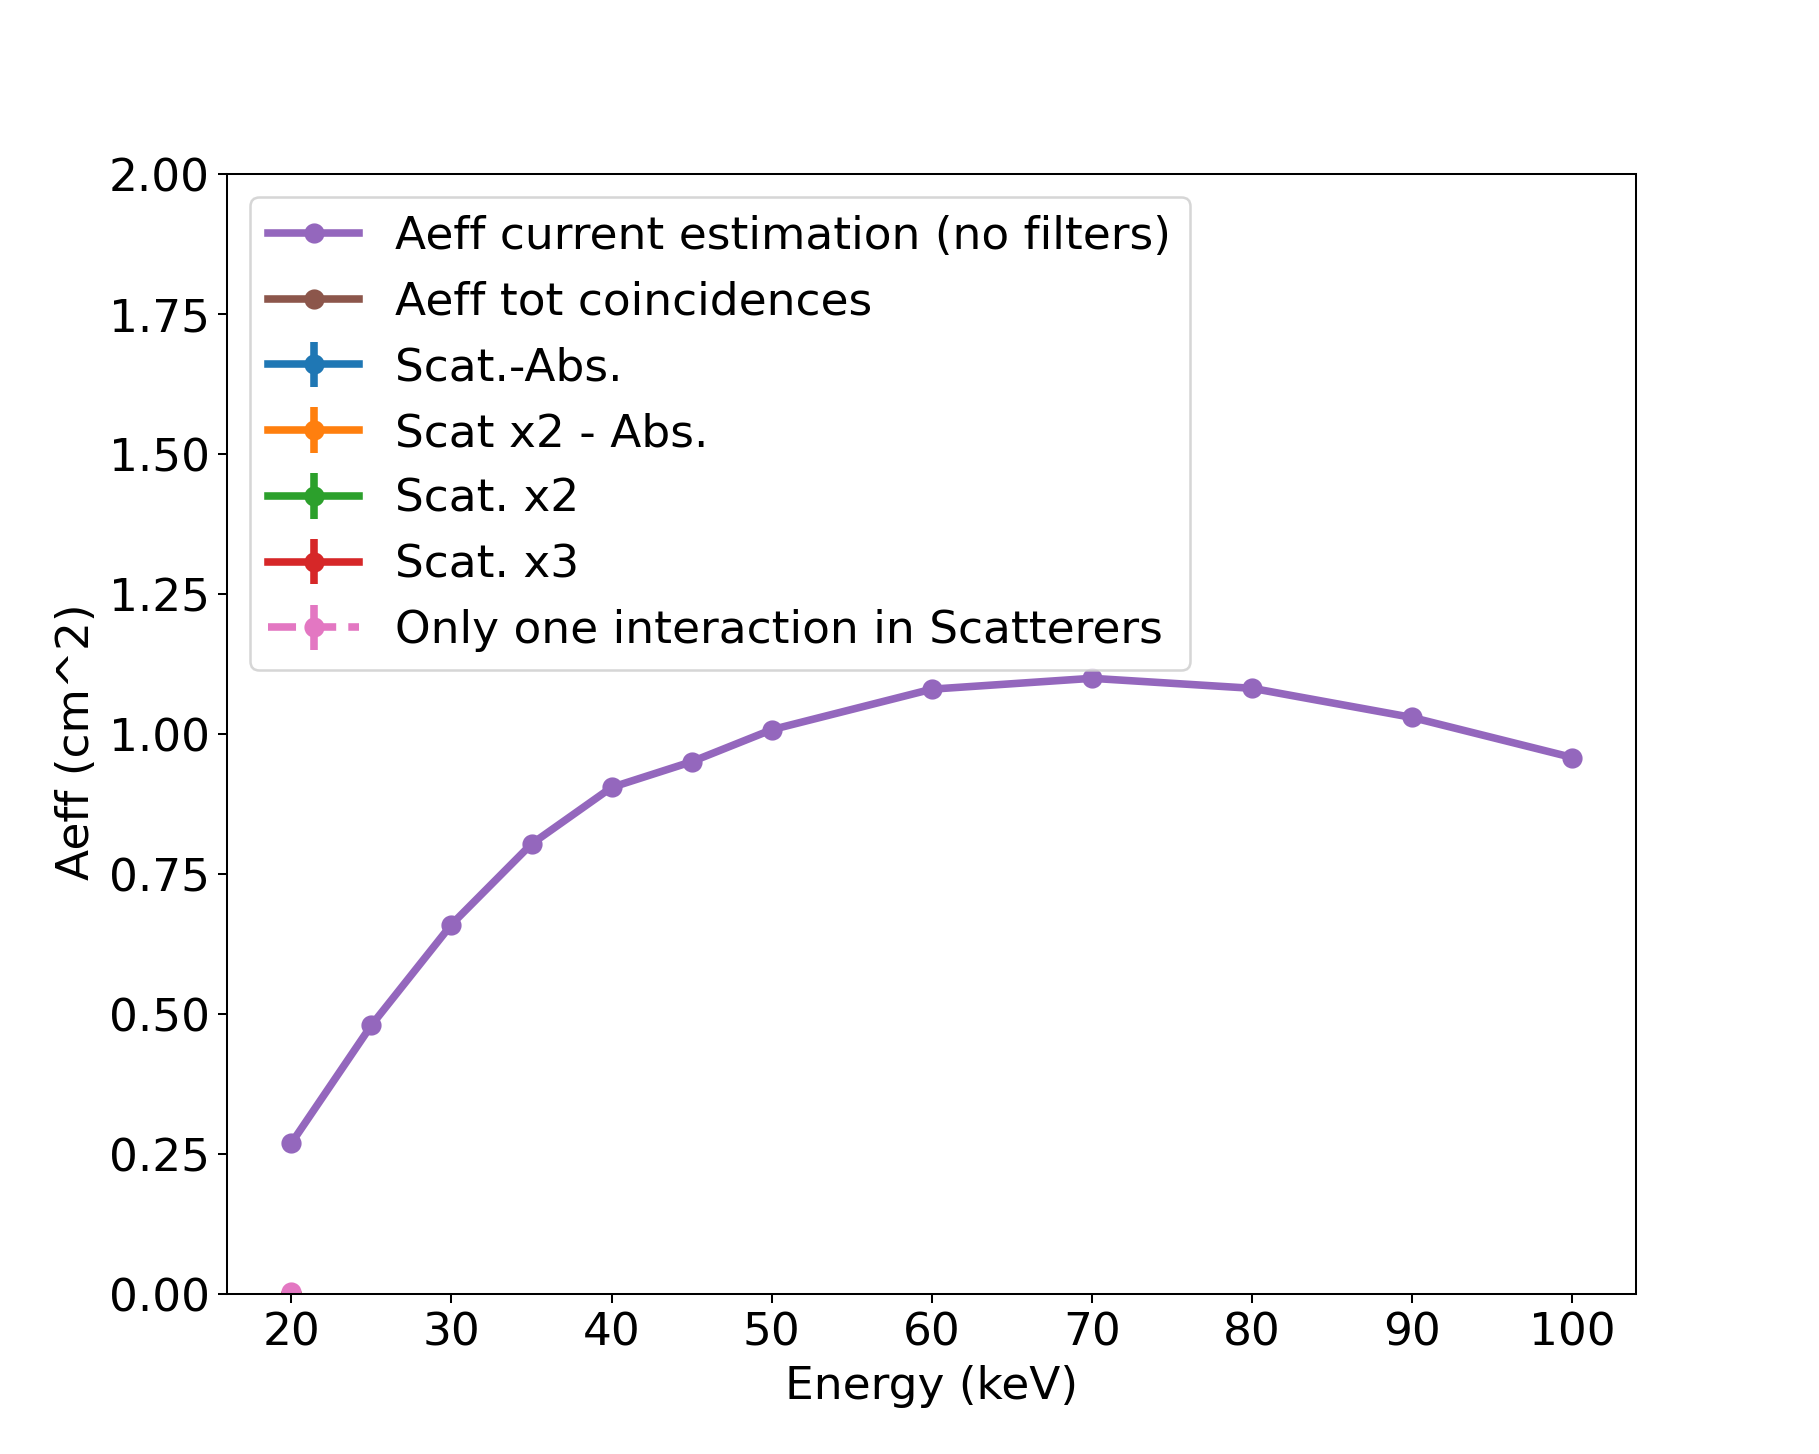

<IPython.core.display.Javascript object>


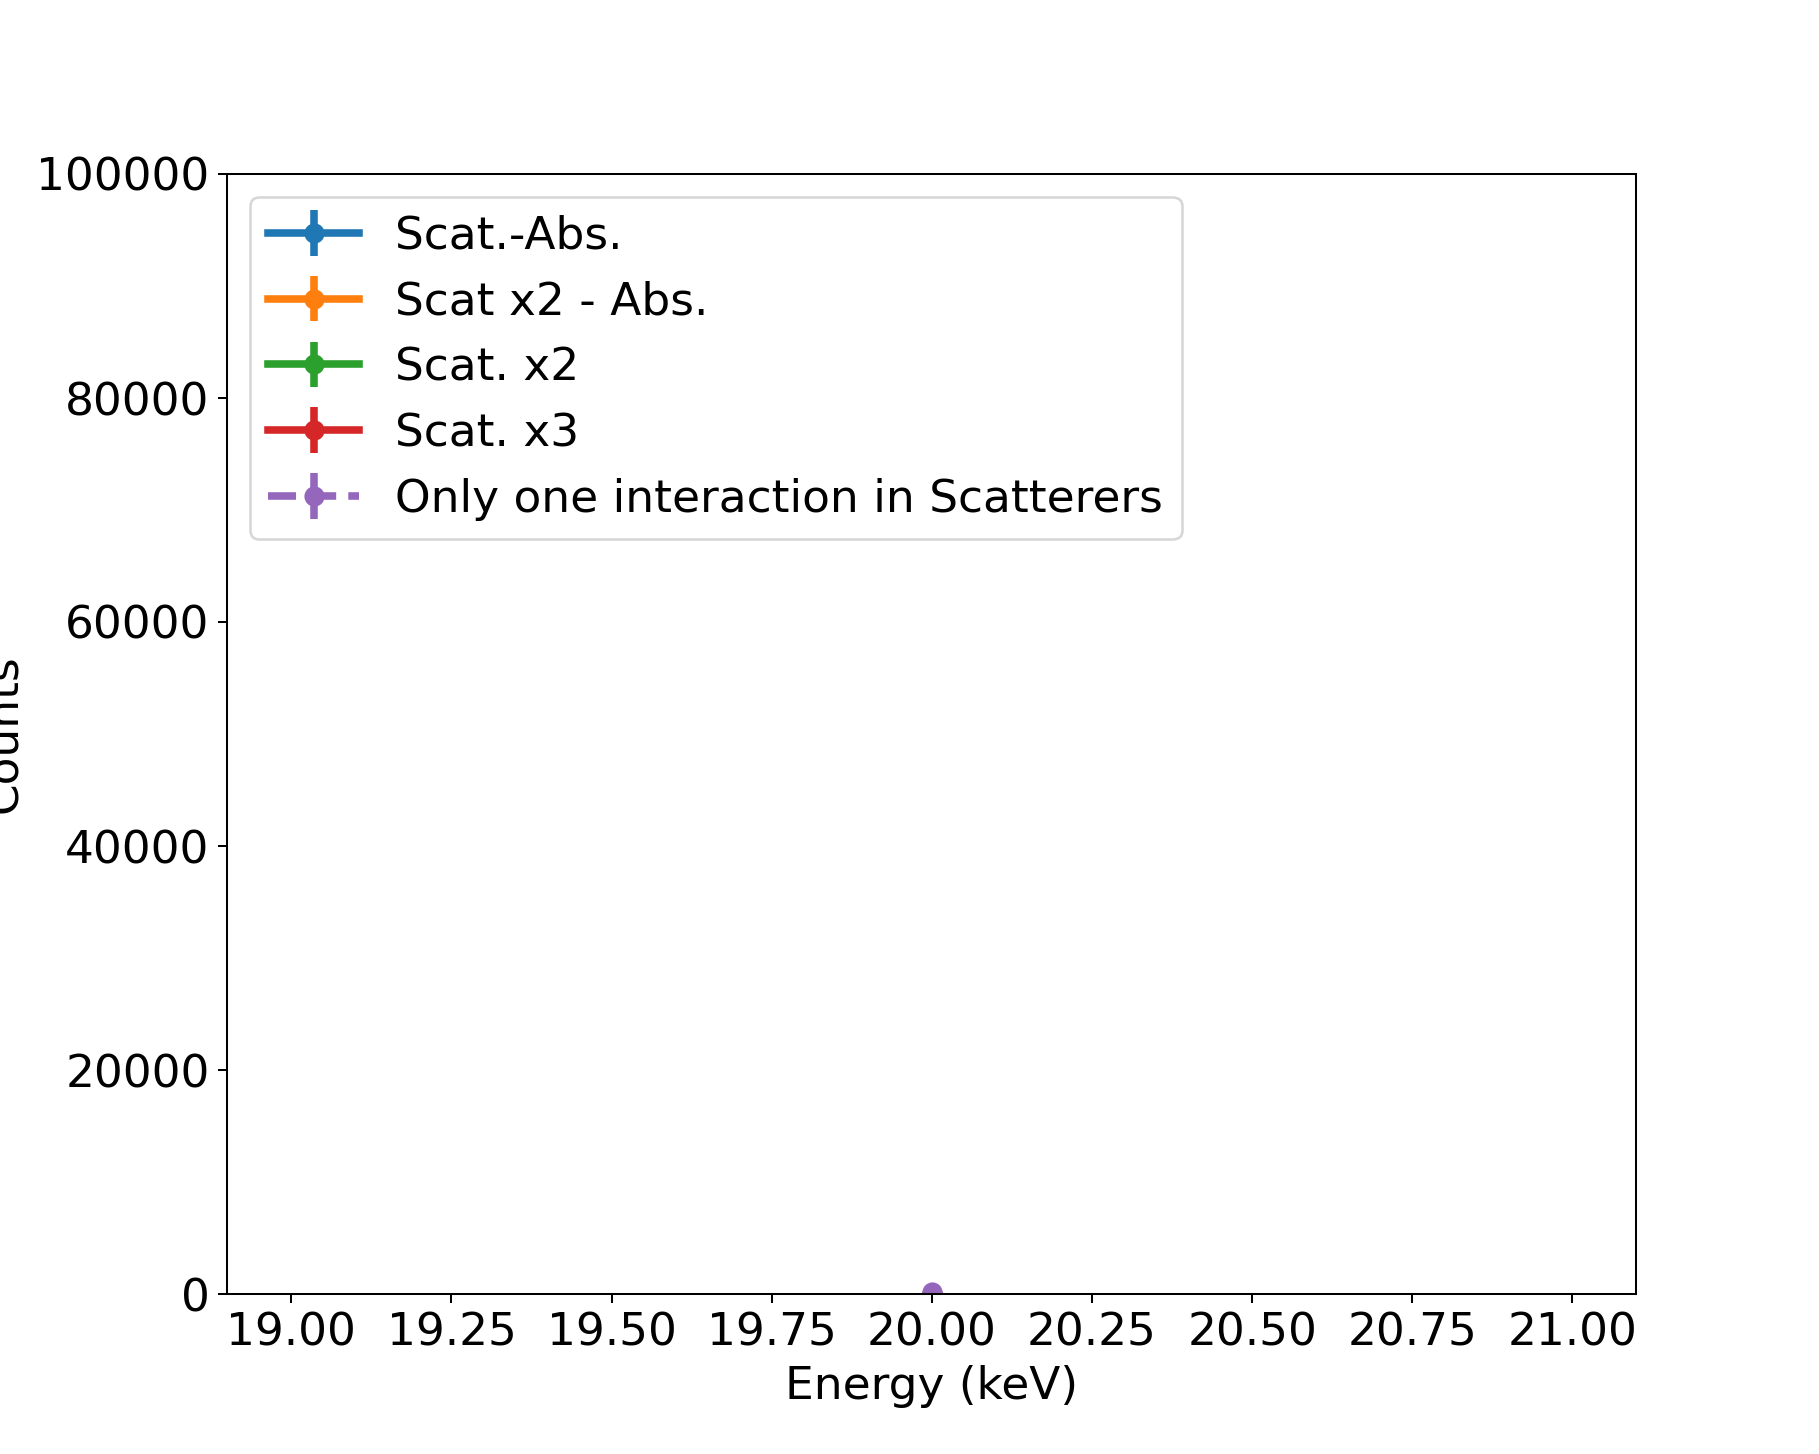

(0.0, 100000.0)

In [26]:
import cusplib

Aeff_tot=[]
Aeff_tot_err=[]

Aeff_sct_abs_en=[]
Aeff_sct_abs_en_err=[]
Aeff_sctX2_abs_en=[]
Aeff_sctX2_abs_en_err=[]
Aeff_sctX2_en=[]
Aeff_sctX2_en_err=[]
Aeff_sctX3_en=[]
Aeff_sctX3_en_err=[]

counts_sct_abs_en=[]
counts_sct_abs_en_err=[]
counts_sctX2_abs_en=[]
counts_sctX2_abs_en_err=[]
counts_sctX2_en=[]
counts_sctX2_en_err=[]
counts_sct_photoabs_en=[]
counts_sct_photoabs_en_err=[]
counts_sctX3_en=[]
counts_sctX3_en_err=[]

Aeff_sct_photoabs_en=[]
Aeff_sct_photoabs_en_err=[]


#filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/'
##filenames=['scorefile_20keV_unpol.fits','scorefile_25keV_unpol.fits',
#           'scorefile_30keV_unpol.fits','scorefile_35keV_unpol.fits',
#           'scorefile_40keV_unpol.fits','scorefile_45keV_unpol.fits',
#           'scorefile_50keV_unpol.fits','scorefile_60keV_unpol.fits',
#           'scorefile_80keV_unpol.fits','scorefile_100keV_unpol.fits']
#energies=[20.,25.,30.,35.,40.,45.,50.,60.,80.,100.]
#no_photons=[10e+6,10e+6,1e+6,1e+6,10e+6,1e+6,1e+6,1e+6,1e+6,10e+6]

#filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/12cmtimes12cm_source/'
#filenames=['scorefile_20keV_unpol_all_vacuum_no_bars.fits', 'scorefile_50keV_unpol_all_vacuum_no_bars.fits', 'scorefile_100keV_unpol_all_vacuum_no_bars.fits']
#energies=[20., 50., 100.]
#no_photons=[10e+6, 10e+6, 10e+6]


#filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/largesource/'
#filenames=['scorefile20keV_unpol_100x100mm2_source.fits','scorefile50keV_unpol_100x100mm2_source.fits','scorefile100keV_unpol_100x100mm2_source.fits']
#energies=[20., 50., 100.]
#no_photons=[10e+6,10e+6,10e+6]

filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/12x12_source_hx_hz/'
filenames=['scorefilescorefile20keV_unpol_12x12mm2_hx_hz.source.fits.fits']#,'scorefile50keV_unpol_12x12mm2_hx_hz.source.fits','scorefile100keV_unpol_12x12mm2_hx_hz.source.fits']
energies=[20.]#, 50., 100.]
no_photons=[10e+6]#,10e+6,10e+6]


halfx=60 #mm
halfz=60 #mm
area_beam=(2.*halfx/10.)*(2.*halfz/10.) #cm^2

geometric_area=0.42*0.42*64
for filename,energy, no_photon in zip(filenames, energies, no_photons):
    EventList=cusplib.loadData(filepath+filename)   
    
    #Scatterer-Absorber single coincidences
    Aeff_sct_abs, Aeff_sct_abs_err, counts_sct_abs, counts_sct_abs_err = cusplib.sct_abs_coinc(EventList,energy=energy,no_photons = no_photon, area_beam=area_beam,
                      geometric_area=geometric_area, n_bins = 500,en_max=energy,
                      en_min=0.,en_threshold_emax=200.,en_threshold_emin=0.)
    Aeff_sct_abs_en.append(Aeff_sct_abs)
    Aeff_sct_abs_en_err.append(Aeff_sct_abs_err)
    counts_sct_abs_en.append(counts_sct_abs)
    counts_sct_abs_en_err.append(counts_sct_abs_err)
    #Double Scatterer-Absorber coincidences
    Aeff_sctX2_abs, Aeff_sctX2_abs_err, counts_sctX2_abs, counts_sctX2_abs_err = cusplib.sctX2_abs_coinc(EventList,energy=energy,no_photons = no_photon, area_beam=area_beam,
                      geometric_area=geometric_area, n_bins = 500,en_max=energy,
                      en_min=0.,en_threshold_emax=200.,en_threshold_emin=0.)
    Aeff_sctX2_abs_en.append(Aeff_sctX2_abs)
    Aeff_sctX2_abs_en_err.append(Aeff_sctX2_abs_err)
    counts_sctX2_abs_en.append(counts_sctX2_abs)
    counts_sctX2_abs_en_err.append(counts_sctX2_abs_err)
    #Multiplicity 2 Scatterer-Scatterer coincidences
    Aeff_sctX2, Aeff_sctX2_err, counts_sctX2, counts_sctX2_err = cusplib.sctX2_coinc(EventList,energy=energy,no_photons = no_photon, area_beam=area_beam,
                      geometric_area=geometric_area, n_bins = 500,en_max=energy,
                      en_min=0.,en_threshold_emax=200.,en_threshold_emin=0.)
    Aeff_sctX2_en.append(Aeff_sctX2)
    Aeff_sctX2_en_err.append(Aeff_sctX2_err)
    counts_sctX2_en.append(counts_sctX2)
    counts_sctX2_en_err.append(counts_sctX2_err)
    #Multiplicity 3 Scatterer-Scatterer-Scatterer coincidences
    Aeff_sctX3, Aeff_sctX3_err, counts_sctX3, counts_sctX3_err = cusplib.sctX3_coinc(EventList,energy=energy,no_photons = no_photon, area_beam=area_beam,
                      geometric_area=geometric_area, n_bins = 500,en_max=energy,
                      en_min=0.,en_threshold_emax=200.,en_threshold_emin=0.)
    Aeff_sctX3_en.append(Aeff_sctX3)
    Aeff_sctX3_en_err.append(Aeff_sctX3_err)  
    counts_sctX3_en.append(counts_sctX3)
    counts_sctX3_en_err.append(counts_sctX3_err)  
    #Only one interaction in scatterers
    Aeff_sct_photoabs, Aeff_sct_photoabs_err, counts_sct_photoabs, counts_sct_photoabs_err = cusplib.sct_one_interaction(EventList,energy=energy,no_photons = no_photon, area_beam=area_beam,
                      geometric_area=geometric_area, n_bins = 500,en_max=energy,
                      en_min=0.,en_threshold_emax=200.,en_threshold_emin=0.)
    Aeff_sct_photoabs_en.append(Aeff_sct_photoabs)
    Aeff_sct_photoabs_en_err.append(Aeff_sct_photoabs_err)
    counts_sct_photoabs_en.append(counts_sct_photoabs)
    counts_sct_photoabs_en_err.append(counts_sct_photoabs_err)
    
    


    
Aeff_tot=[x + y for x, y in zip(Aeff_sct_abs_en, Aeff_sctX2_abs_en)]
Aeff_tot=[x + y for x, y in zip(Aeff_tot, Aeff_sctX2_en )]
Aeff_tot=[x + y for x, y in zip(Aeff_tot, Aeff_sctX3_en )]
    


#Current docs Aeff
energy_curr=[20.,25.,30.,35.,40.,45.,50.,60.,70.,80.,90.,100.]
Aeff_curr=[0.2692068,0.4798978,0.6597955,0.8036113,
           0.9046065,0.9504979,1.0076489,1.0800686,
           1.0994317,1.081604,1.0294857,0.9580043]

plt.figure(figsize=(10, 8))
plt.errorbar(energies,Aeff_sct_abs_en,yerr=Aeff_sct_abs_en_err, fmt ='o-', label='Scat.-Abs.')
plt.errorbar(energies,Aeff_sctX2_abs_en,yerr=Aeff_sctX2_abs_en_err, fmt ='o-', label='Scat x2 - Abs.')
plt.errorbar(energies,Aeff_sctX2_en,yerr=Aeff_sctX2_en_err, fmt ='o-', label='Scat. x2')
plt.errorbar(energies,Aeff_sctX3_en,yerr=Aeff_sctX3_en_err, fmt ='o-', label='Scat. x3')
plt.plot(energy_curr, Aeff_curr,'o-', label='Aeff current estimation (no filters)')
plt.plot(energies, Aeff_tot,'o-', label='Aeff tot coincidences')

plt.errorbar(energies,Aeff_sct_photoabs_en,yerr=Aeff_sct_photoabs_en_err, fmt ='o--', label='Only one interaction in Scatterers')

plt.xlabel('Energy (keV)')
plt.ylabel('Aeff (cm^2) ')
plt.legend(loc='upper left')
plt.ylim(0.,2.)



#counts
plt.figure(figsize=(10, 8))
plt.errorbar(energies,counts_sct_abs_en,yerr=counts_sct_abs_en_err, fmt ='o-', label='Scat.-Abs.')
plt.errorbar(energies,counts_sctX2_abs_en,yerr=counts_sctX2_abs_en_err, fmt ='o-', label='Scat x2 - Abs.')
plt.errorbar(energies,counts_sctX2_en,yerr=counts_sctX2_en_err, fmt ='o-', label='Scat. x2')
plt.errorbar(energies,counts_sctX3_en,yerr=counts_sctX3_en_err, fmt ='o-', label='Scat. x3')
plt.errorbar(energies,counts_sct_photoabs_en,yerr=counts_sct_photoabs_en_err, fmt ='o--', label='Only one interaction in Scatterers')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend(loc='upper left')
plt.ylim(0.,100000.)





<IPython.core.display.Javascript object>


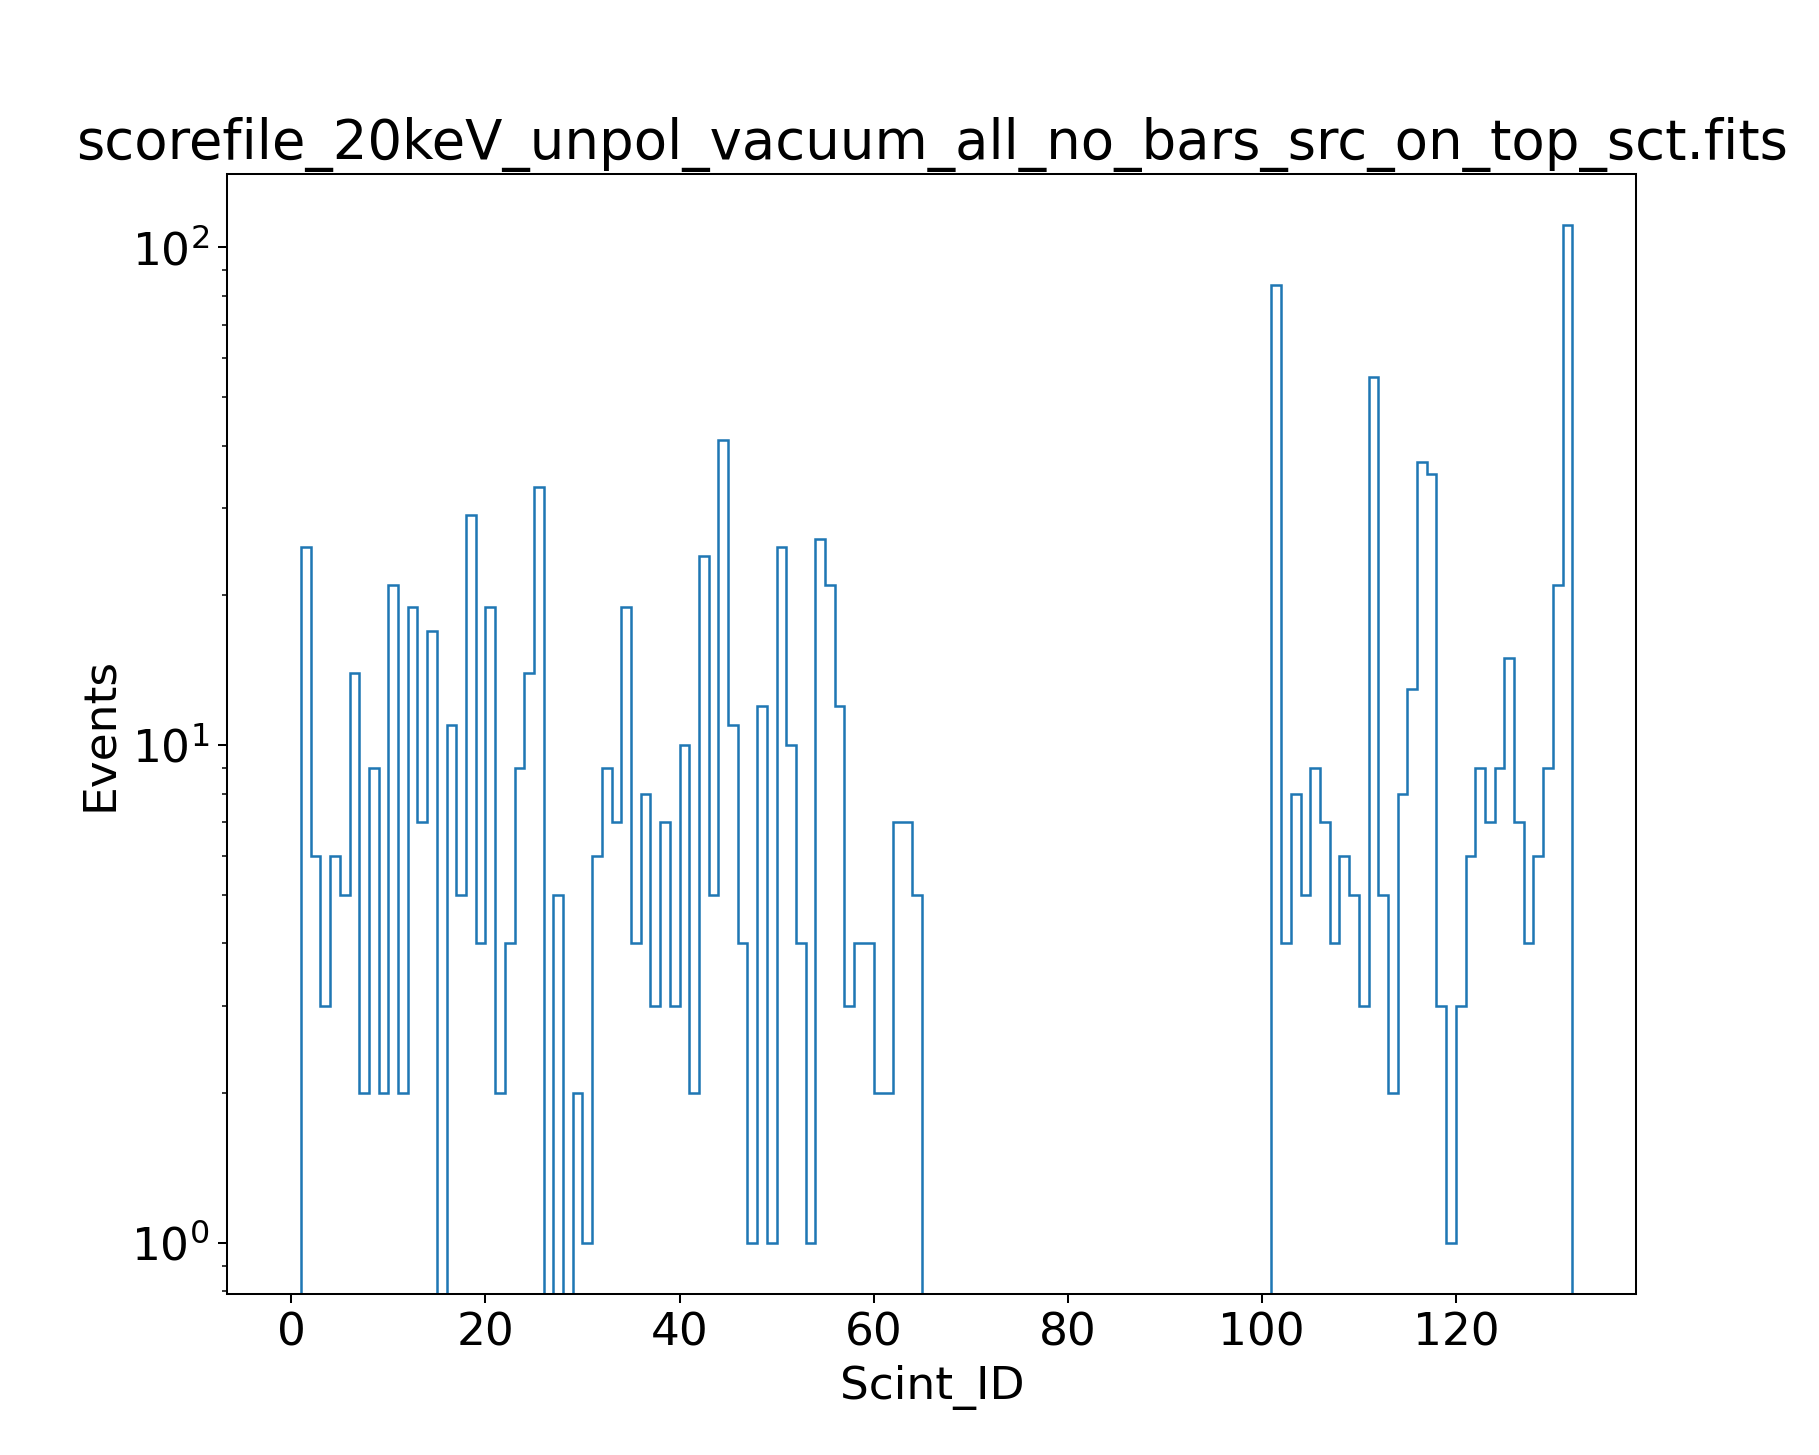

Filename: /home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/small_src/scorefile_20keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   1087R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
scorefile_20keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits


<IPython.core.display.Javascript object>


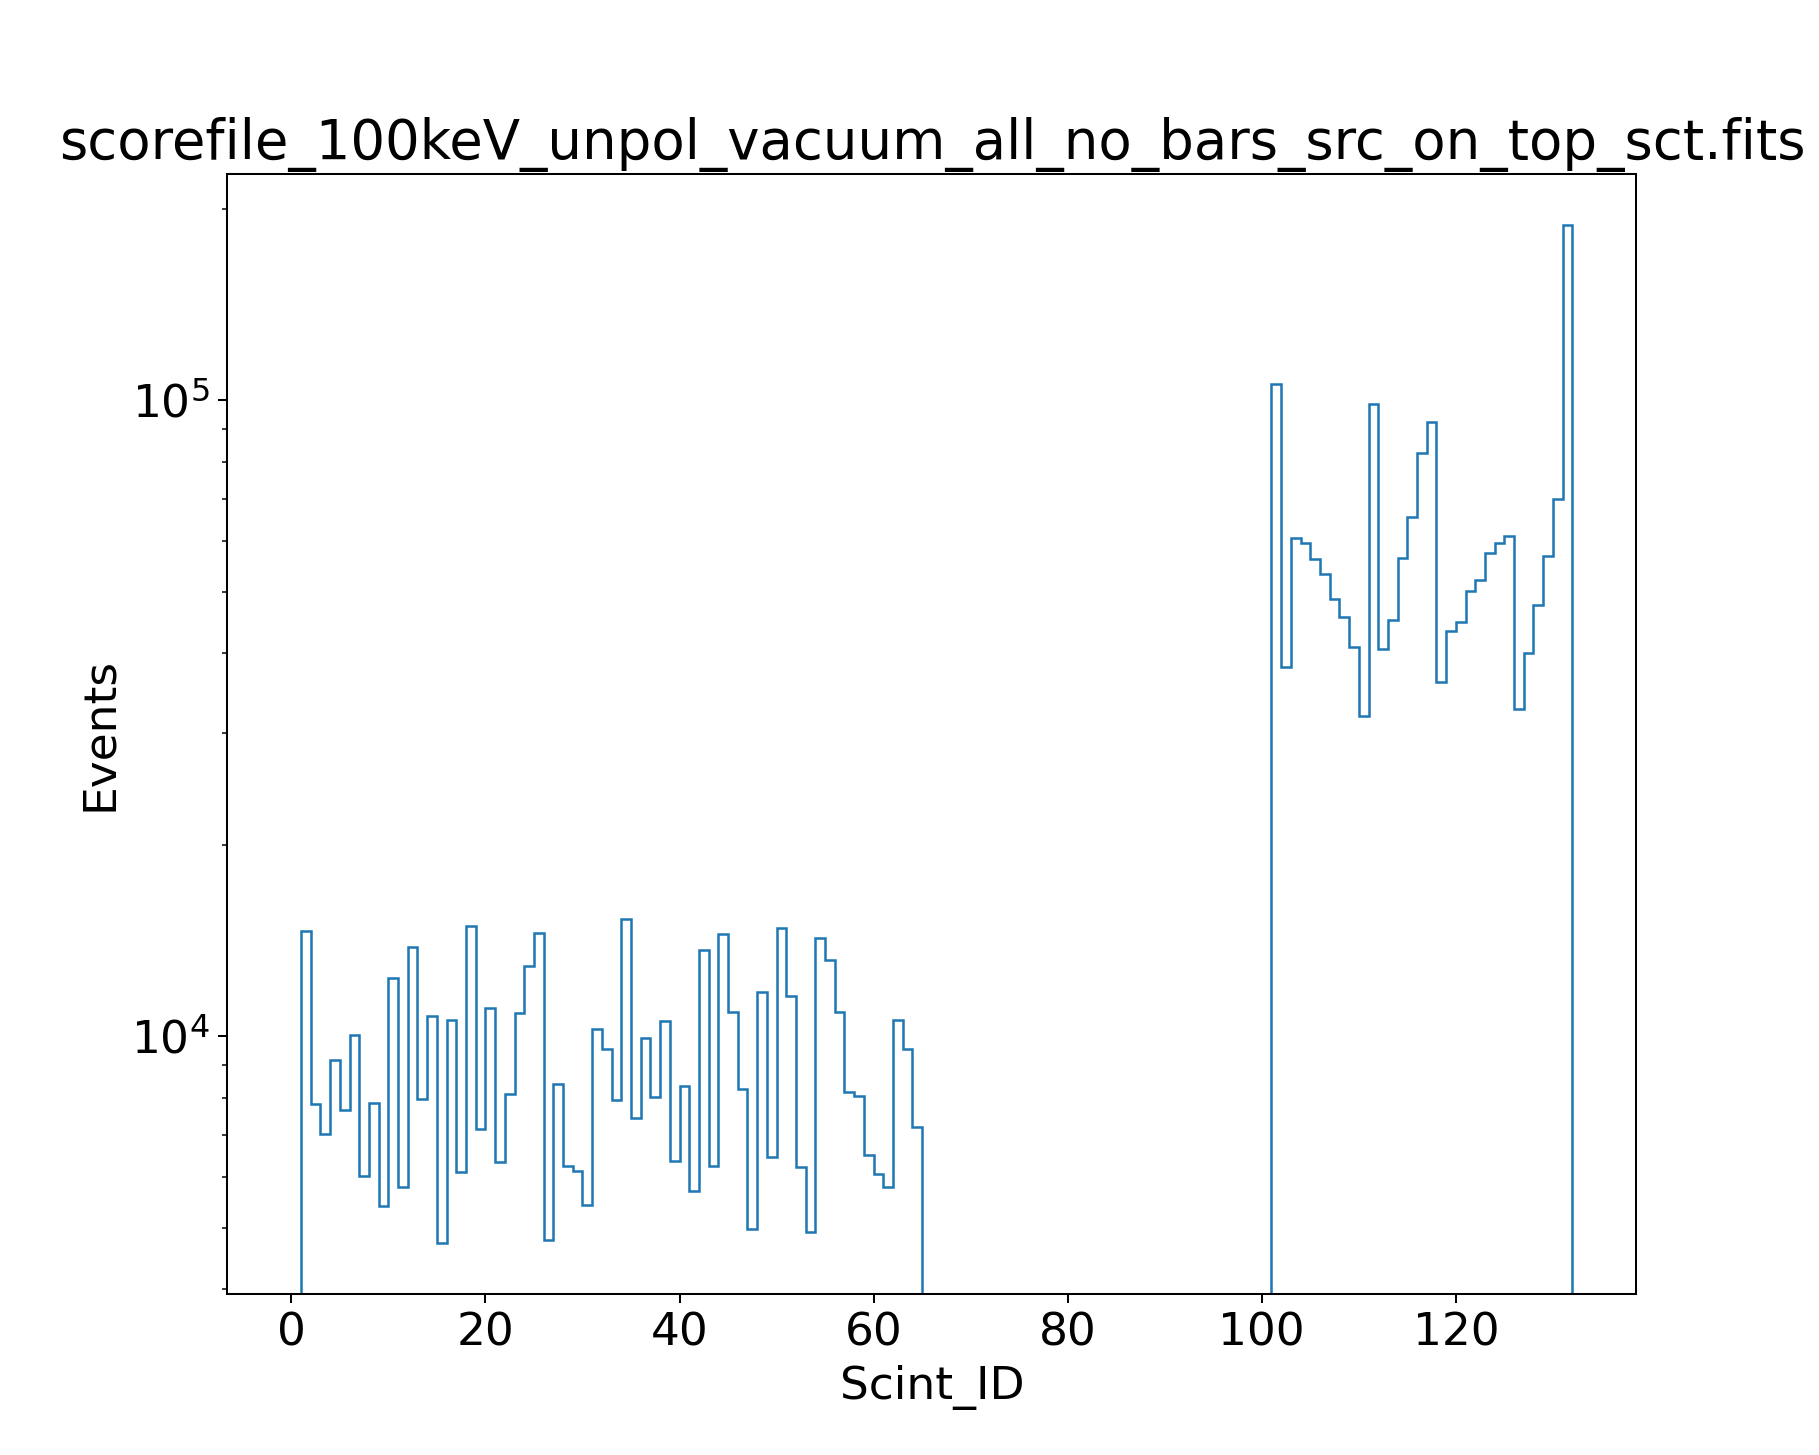

Filename: /home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/small_src/scorefile_100keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   2442223R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
scorefile_100keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits


In [21]:
import cusplib

filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/small_src/'
filename=filepath+'scorefile_20keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits'

cusplib.bars_mapping(filename,log_y=True,plots_label='bars mapping1')


filepath='/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/small_src/'
filename=filepath+'scorefile_100keV_unpol_vacuum_all_no_bars_src_on_top_sct.fits'

cusplib.bars_mapping(filename,log_y=True,plots_label='bars mapping2')

Filename: /home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/scorefile_60keV_pol100x.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   1049397R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degree'
    name = 'En_Primary'; format = '1D'; unit = 'keV'
    name = '

<IPython.core.display.Javascript object>


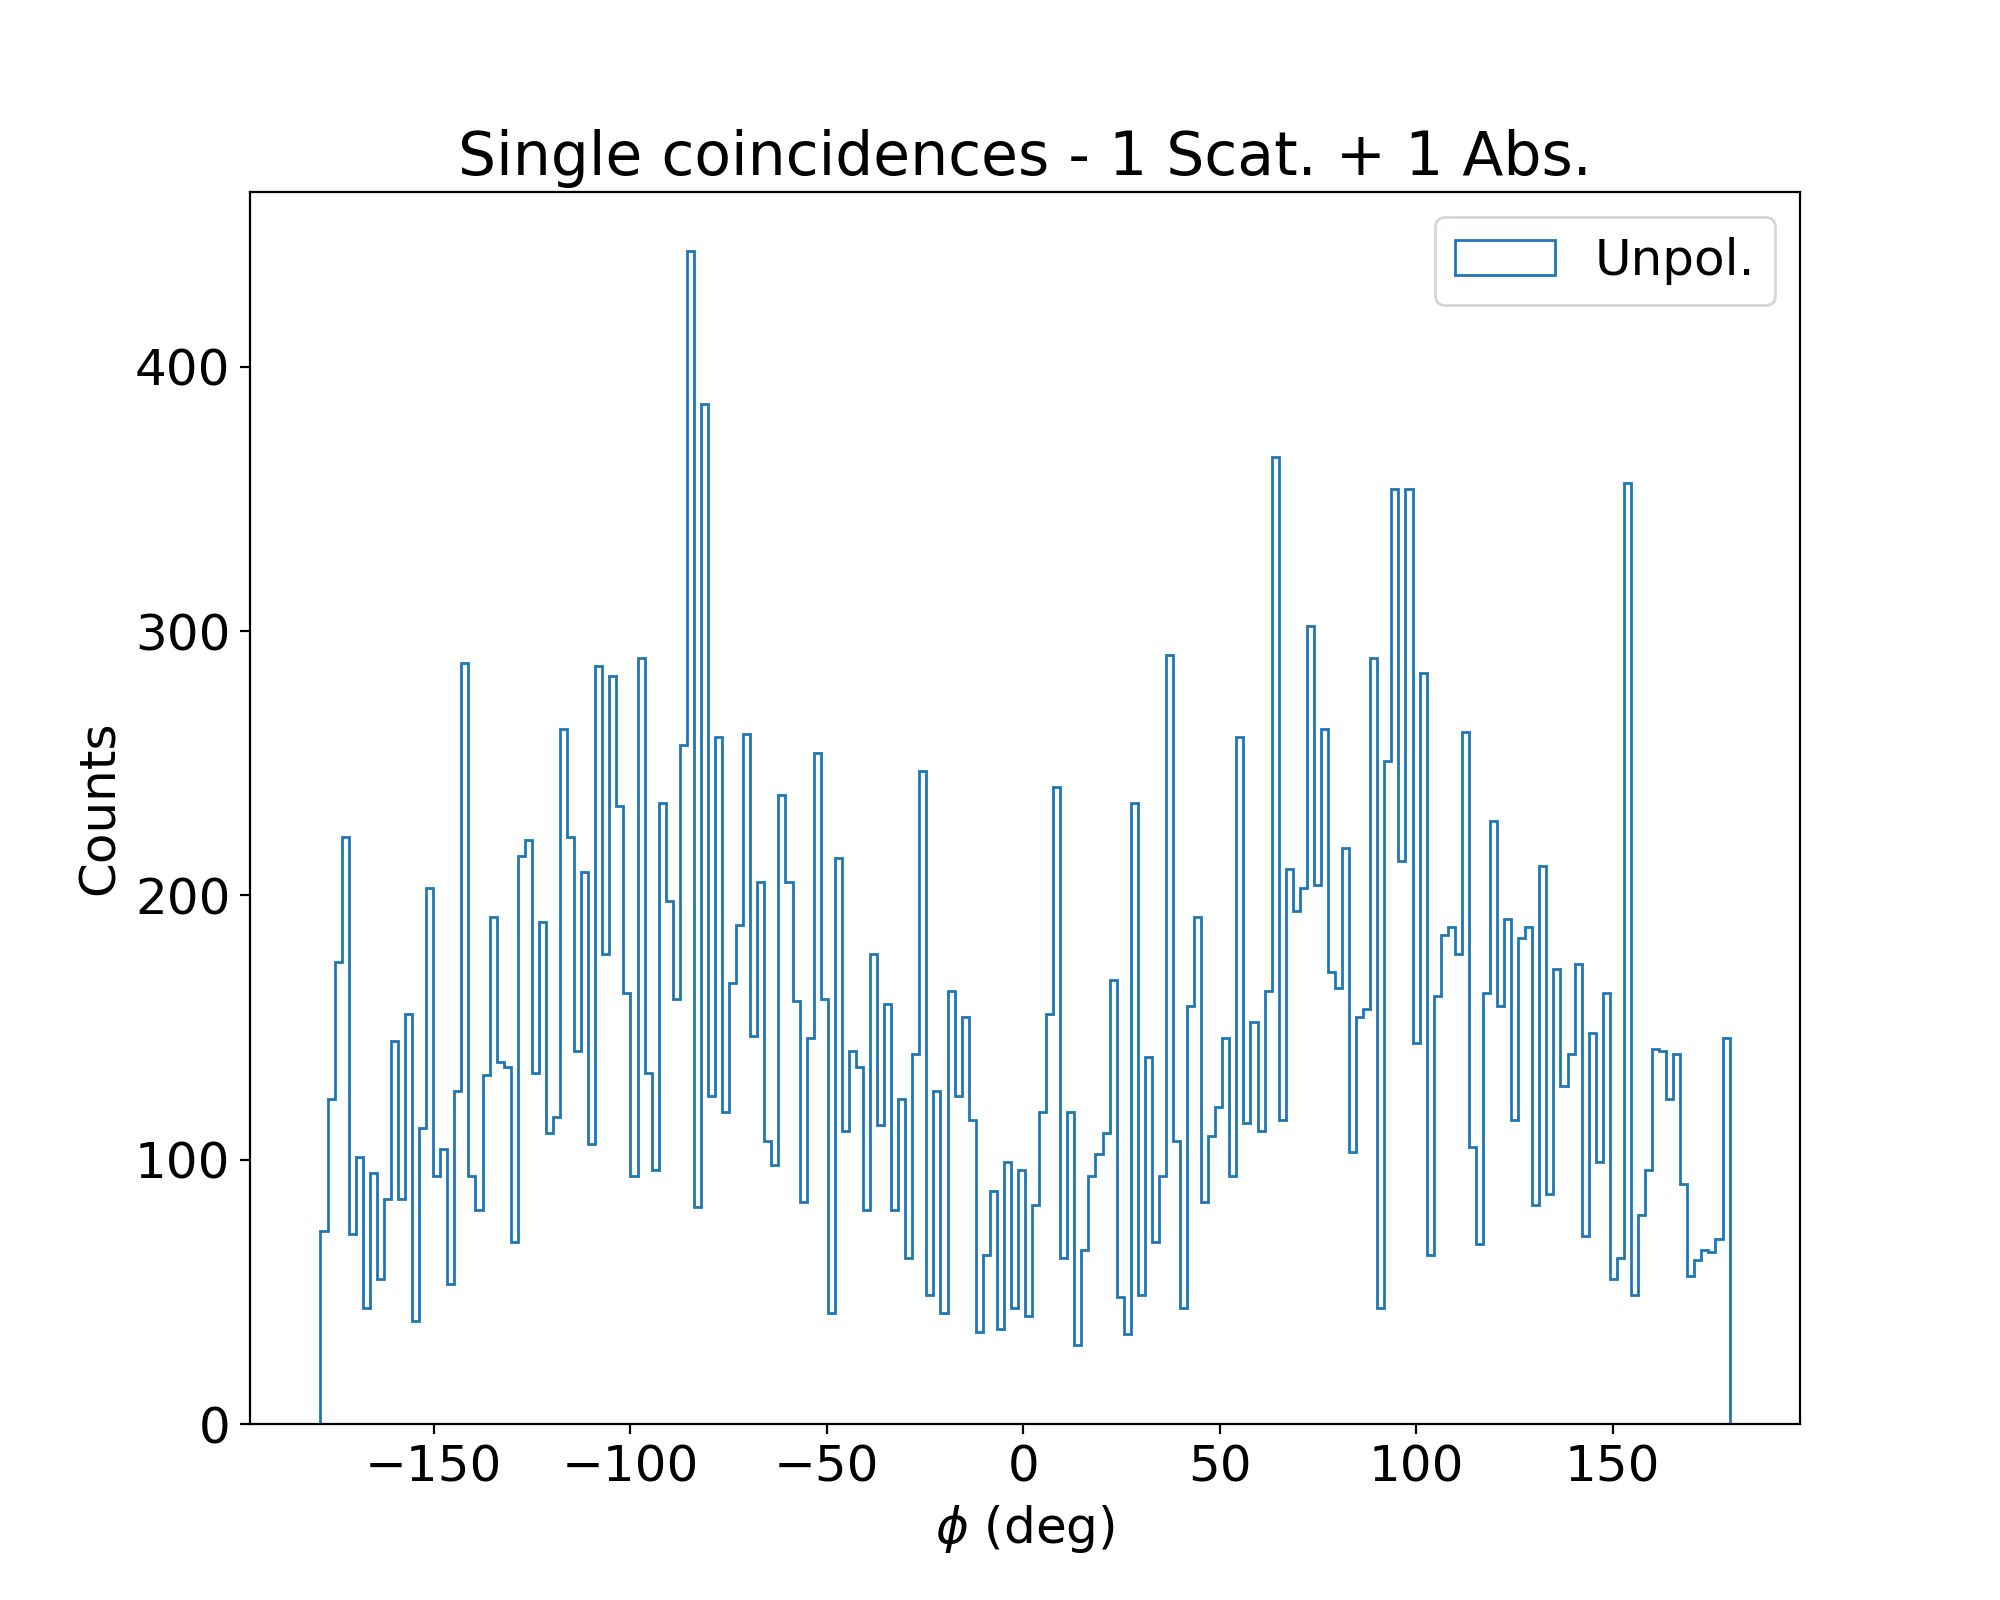

In [41]:
#Modulation single scattering
import random

for filename,energy, no_photon in zip(filenames, energies, no_photons):
    EventList=cusplib.loadData(filepath+filename)  

    phi=[]
    #Scatt-Abs coinc
    for evt in list(EventList.keys()):
        if( (len(EventList[evt]['Scint_ID'])==2)and\
           (EventList[evt]['Scint_ID'][0]<100)and\
           (EventList[evt]['Scint_ID'][1]>100)
          ):
            x1 = EventList[evt]['X_Detected'][0]
            z1 = EventList[evt]['Z_Detected'][0]
            x2 = EventList[evt]['X_Detected'][1]
            z2 = EventList[evt]['Z_Detected'][1]
            
            dx=x2-x1
            dz=z2-z1


            phi_rad=np.arctan2(dz,dx)
            phi_deg=np.rad2deg(phi_rad)
            phi.append(phi_deg)

    plt.figure(figsize=(10, 8))

    # We can set the number of bins with the *bins* keyword argument.
    n_bins = 200
    plt.hist(phi, bins=n_bins, histtype='step', label='Unpol.')
    plt.xlabel('$\phi$ (deg)')
    plt.ylabel('Counts')
    plt.legend()
    plt.title('Single coincidences - 1 Scat. + 1 Abs.')

# Data Content

In [13]:
hdul = fits.open("/home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/12cmtimes12cm_source/scorefile_20keV_unpol_all_vacuum_no_bars.fits")

hdul.info()
events = hdul[1].data
print(events.columns)

t_ID = events['EventID']
t_ED = events['En_dep']
t_SI = events['Scint_ID']
t_XP = events['X_Primary']
t_YP = events['Y_Primary']
t_ZP = events['Z_Primary']
t_TP = events['Theta_Primary']
t_PP = events['Phi_Primary']
t_EP = events['En_Primary']
t_Dx = events['X_Detected']
t_Dy = events['Y_Detected']
t_Dz = events['Z_Detected']


data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

Filename: /home/sergio/Lavoro/GruppoPolarimetria/Missioni/CUSP/Sofware/datasim/unpol/scatterer_layers_G4_Galactic/all_G4_except_bars/12cmtimes12cm_source/scorefile_20keV_unpol_all_vacuum_no_bars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     49   35391R x 15C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degree'
    name =

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,169,20.000000,111,-3.092062,4.157103,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
1,444,19.995151,111,-3.292535,8.880177,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
2,734,20.000000,111,-3.407147,12.826886,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
3,763,20.000000,111,-3.452335,4.479248,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
4,867,20.000000,111,-3.470616,4.046969,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
...,...,...,...,...,...,...,...,...,...,...,...,...
35386,9998885,20.000000,111,-3.204859,8.563974,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
35387,9998955,20.000000,111,-3.417802,4.235198,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
35388,9999004,20.000000,111,-3.172177,15.644141,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
35389,9999816,20.000000,111,-3.512353,4.323508,0.0,90.0,90.0,20.0,-32.842033,10.521104,0.532759
